In [7]:
import pandas as pd
from matplotlib_venn import venn2
import matplotlib.pyplot as plt
import os

# Paths
BULK_HVG_CSV = "bulk_hvg_analysis_outputs/bulk_HVGs_top4000.csv"
SC_HVG_CSV   = "scry_hvg_outputs/scry_bulk_overlap_SIDG.csv"
MAP_CSV      = "../../../../maps/gene_id_to_symbol_mapping.csv"

OUTDIR = "hvg_overlap_outputs"
os.makedirs(OUTDIR, exist_ok=True)


In [8]:
# Bulk HVGs (SIDG IDs)
bulk_hvgs = pd.read_csv(BULK_HVG_CSV, header=None).iloc[:,0].astype(str)
print("Bulk HVGs:", bulk_hvgs.shape)

# sc HVGs (symbols)
sc_hvg_sidg = pd.read_csv(SC_HVG_CSV)["gene"].astype(str)
print("sc HVGs:", sc_hvg_sidg.shape)




Bulk HVGs: (4001,)
sc HVGs: (3952,)


In [9]:
# Map symbols to SIDG IDs

# Report mapping success
n_mapped = sc_hvg_sidg.notna().sum()
n_total = len(sc_hvg_sidg)
print(f"Mapped {n_mapped}/{n_total} sc HVGs ({n_mapped/n_total:.1%})")

# Drop unmapped + duplicates
sc_hvg_sidg = sc_hvg_sidg.dropna().drop_duplicates()
print("After cleanup:", sc_hvg_sidg.shape)


Mapped 3952/3952 sc HVGs (100.0%)
After cleanup: (3952,)


In [10]:
# Convert to sets
bulk_set = set(bulk_hvgs)
sc_set   = set(sc_hvg_sidg)

# Compute overlap
overlap = bulk_set & sc_set
print("Bulk HVGs:", len(bulk_set))
print("sc HVGs:", len(sc_set))
print("Overlap:", len(overlap))

# Save overlap list
pd.Series(sorted(overlap), name="SIDG").to_csv(os.path.join(OUTDIR, "HVG_overlap_bulk_sc.csv"), index=False)


Bulk HVGs: 4001
sc HVGs: 3952
Overlap: 2044


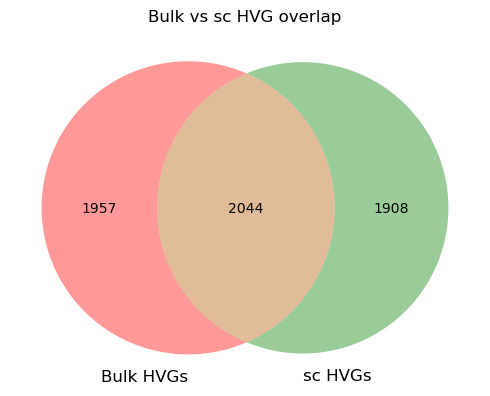

In [11]:
plt.figure(figsize=(5,5))
venn2(subsets=(len(bulk_set - sc_set),
               len(sc_set - bulk_set),
               len(overlap)),
      set_labels=("Bulk HVGs", "sc HVGs"))
plt.title("Bulk vs sc HVG overlap")
plt.tight_layout()
plt.savefig(os.path.join(OUTDIR, "HVG_overlap_venn.png"))
plt.show()
